# Cell Proliferation and Growth 


## Unconstrained growth 

### Discrete

In general, stem cells undergo a phase of proliferation that expands the population, then they start to differentiate to produce the different types of progeny. A very importnat question is to understand how these populations grow in time and how this growth may be affected by external stimuly. 

In developing these types of  population model, a constant relative growth rate is a natural first assumption. In a discrete model, this rate would represent growth over time intervals of some fixed length. Consider as an example the growth of a population of cells, with an initian number of `P(0)`. 

After a given time interval `∆t`, a percentage of the population will reproduce, resulting in a number of new cells `∆P`. This number of newly produced cells has to be  proportional to the initial number of cells `P(0)` (if a population of 20,000 cells produces 1200 new cells in 1 h, then a 4-fold bigger population of 80,000  will produce 4 times as many, i.e., 4800, new cells in 1 h). We can write this proportionality as a discrete system in the following way

$$ p_{n+1} = r \cdot p_n$$

where $p_n$ is the population at the start of hour $n$, $p_{n+1}$ is the number of cells at the end of teh time interval, and $r$ is a fixed growth factor. Here, each term $p_n$ is simply multiplied by $r$ to produce the next term. Because the newly produced cells always add to the population, i.e. the number of cells in the system increases, it is straightforward to see that the number of cells in teh system at succesive time imntervals will be
$$
\begin {equation} 
p_0\\
p_1 =r \cdot p_0 \\
p_2 =r \cdot p_1 = r^2 \cdot p_0 \\
p_3 =r \cdot p_2 = r^3 \cdot p_0 \\
···\\
\end {equation}
$$


So, in general $$p_{n}=r^n \cdot p_0$$

The factor $r$ exceeds unity by the relative growth rate. For example, if the population increases by $6\%$ each hour then $r = 1.06$. In general, with a positive relative growth rate, the solution to is an exponential function with base $r > 1$

In [1]:
final_time = 50;     #number of iterations
P = Array{Float64, 2}(undef, 1, final_time) #store the initial value solution in a vector
P[1]=10 # Initial number of cells
r = 1.05;    # growth rate

In [2]:
for n = 1:1:final_time-1
    P[n+1] = P[n]*r
#P[n+1] = P[n] + r*P[n]*(1-P[n]/c);
end

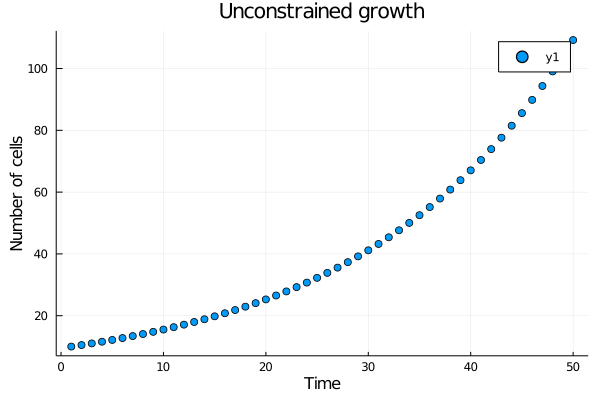

In [3]:
using Plots
p1=scatter([1:final_time],P[:],line = (:dot, 4))
title!("Unconstrained growth")
xlabel!("Time")
ylabel!("Number of cells")

Although this population model might be fairly accurate in the short term, this type of exponential growth is not realistic in the long term. For instance, there will be potentially a limitation in environmental factors (size, nutrients...). A simple approximation but much more realistic, it is to assume that $r$ changes with the population size. 

$$ p_{n+1} = r(p_n) \cdot p_n$$


where the function $r(p)$ is set to decrease as the population p increases. From a mathematical standpoint, it is natural to begin an investigation of such models by considering the case of a linear function r(p).

Lets think of a population that initially grows with very little environmental constraint ($r>1$), a situation that might arise when a few members of a new species are introduced into an environment rich in nutrients and habitable area. Over time the population will increase until it approaches some maximum sustainable size, eventually reaching an equilibrium ($r=1$).

Introducing specific numbers, suppose that a population of p = 1000 experiences a growth factor of r(1000) = 1.4. Assume also that the equilibrium population size is 5000, so that the corresponding growth factor is r(5000) = 1.



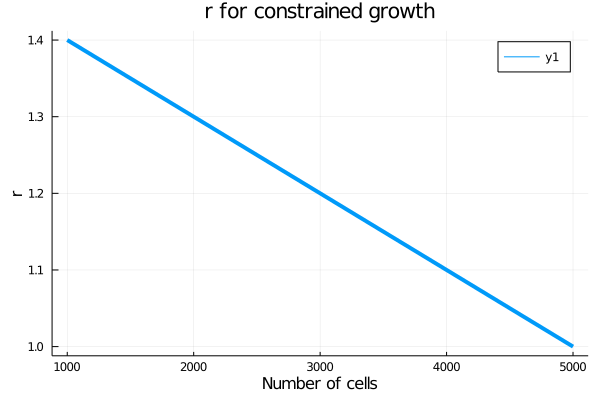

In [8]:
plot([1000,5000],[1.4,1.0],line = (:line, 4))
title!("r for constrained growth")
xlabel!("Number of cells")
ylabel!("r")

The linear function r is thus determined to be

$$
Slope=\frac{1.0 - 1.4}{5000-1000}=\frac{- 0.4}{4000}=\frac{- 0.1}{1000}=-10^{-4}\\
p(0)=1.5
$$
Therefore, the function takes the form

$$
r(p) = 1.5 -10^{-4}p
$$

and the difference equation is now
$$
p_{n+1} = (1.5 −10^{-4} p_{n}) \cdot p_{n} = 10^{-4} (1.5 \times 10^{-4} − p_{n}) \cdot p_{n}
$$

This is an instance of discrete logistic growth. 

In [11]:
growth_factor(p) = 1.5 -10^(-4) * p

growth_factor (generic function with 1 method)

In [ ]:
growth_factor(p)

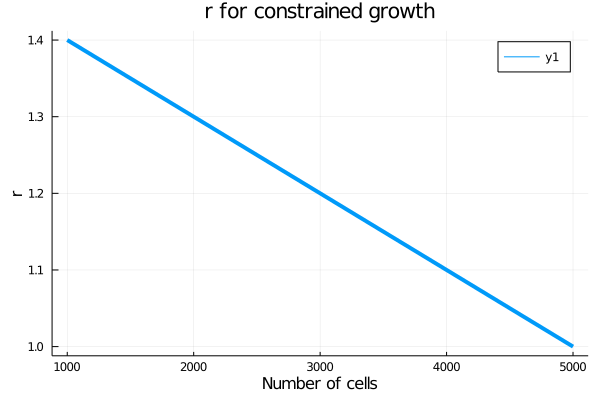

In [15]:
plot([1000,5000],[growth_factor(1000),growth_factor(5000)],line = (:line, 4))
title!("r for constrained growth")
xlabel!("Number of cells")
ylabel!("r")

## Unconstrained growth Continuos

Stem Cell Proliferation Growth In general stem cells undergo a phase of proliferation that expands the population, then they start to differentiate to produce the different types of progeny. Let’s calculate how a population of stem cells grow in time. Lets assume we have an initial number of cells `N` in a population 

After a given time we have a number of new stem cells `∆N` (number of newly produced cells) during a given time interval, `∆t`, is proportional to the initial  number of cells `N`. (If a population of 20,000 cells produces 1200 new cells in 1 h, a 4-fold bigger population of 80,000 cells of the same type of microorganism will produce 4 times as many, viz. 4800, new cells in 1 h): 

$$\frac{\Delta N}{\Delta t} \sim N\tag{1} $$

Because the newly produced cells always add to the population, i.e. N increases steadily, we have to regard time intervals (and accordingly numbers of newly formed cells) that are as small as possible. Mathematically we thus have to deal with infinitesimal increases or differentials: 

$$\frac{\mathrm{d} N}{\mathrm{d} t} \sim N\tag{2}$$

To get from proportionality  to an equation, a proportionality factor, μ, is introduced. This is the specific growth rate or often termed simply growth rate. Sorting of variables yields: 

$$\frac{\mathrm{d} N}{N}  = \mu \mathrm{d} t\tag{3}$$

If we integrate this differential equation:

$$\int \frac{\mathrm{d} N}{N}  = \int \mu \mathrm{d} t \tag{4}$$

 we obtain:
 
 $$\ln N = \mu t + C \tag{5}$$
 
 The undefined integration constant `C` can be fixed if we define the initial conditions: $N(t = 0) = N_0$

 $$\ln N_0 = \mu 0 + C =C \tag{6}$$
 
 so the equation becomes:
 
  $$\ln N = \mu t + \ln N_0 \tag{7}$$
  
  and after applying the properties of logatithms:
  
  $$\ln N - \ln N_0= \mu t  \tag{8}$$
  $$\ln \frac{N}{N_0}= \mu t  \tag{9}$$
  $$\frac{N}{N_0}= e^{\mu t}  \tag{10}$$
  $$N= N_0 e^{\mu t}  \tag{11}$$
  
   If the time that has passed is exactly the average length of the cell cycle of the stem cell population, we can write that in $t = T$ the population has doubled, so $N_0$ has increased to $2 N_0$:

   $$2 N= N_0 e^{\mu T}  \tag{12}$$
   
   $$\frac{2 N_0}{N_0 }=2= e^{\mu T}  \tag{13}$$
   
   $$ \ln 2= \mu T  \tag{14}$$
   
   So, the proportionality constant is related to the cell cycle length as:

   $$  \mu = \frac{\ln 2}{T}  \tag{15}$$




In [1]:
using Plots
gr()

Plots.GRBackend()

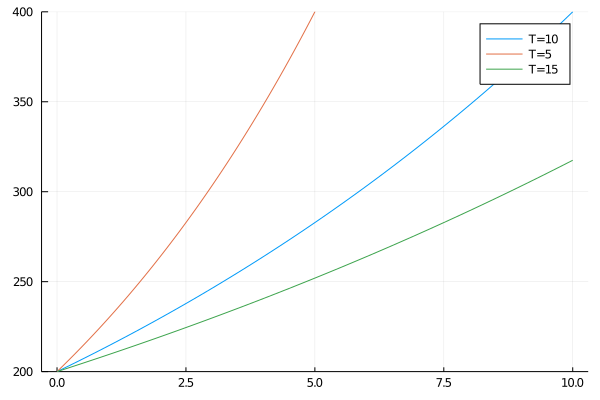

In [2]:
N₀=200
t=collect(0:0.1:10)
T=10
μ=log(2)/T
plot(t,t->N₀*exp(μ*t),label="T=10",seriestype=:line,ylims = (200,400))
T=5
μ=log(2)/T
plot!(t,t->N₀*exp(μ*t),label="T=5",seriestype=:line,ylims = (200,400))
T=15
μ=log(2)/T
plot!(t,t->N₀*exp(μ*t),label="T=15",seriestype=:line,ylims = (200,400))

# Logistic Growth 

We can introduce in the original equation a term that accounts for the limitation of resources 

$$1 -\frac{N}{K} \tag{16}$$

This factor is close to 1 (i.e., has no effect) when N is much smaller than K, and which is close to 0 when N is close to K. The resulting differential equation is called is the logistic growth model.


$$\frac{\mathrm{d} N}{\mathrm{d} t}=\mu N(1 -\frac{N}{K}) \tag{17}$$

separate variables

$$\frac{\mathrm{d} N}{N(1 -\frac{N}{K})}=\mu \mathrm{d} t   \tag{18}$$

Our next goal would be to integrate both sides of this equation, but the form of the right hand side doesn't look elementary and will require a partial fractions expansion. That is, we wish to write 


$$\frac{1}{N(1 -\frac{N}{K})} = \frac{A}{N}+\frac{B}{1 -\frac{N}{K}} \tag{19}$$

where $A$ and $B$ are unknown constants. If we multiply on the left and right hand sides by  $N \left( 1- \frac{N}{K} \right)$ (which is equivalent to putting the right hand side over a common denominator) we arrive at the equation 

$$
1 = A \ \left( 1 -\frac{N}{K}\right) + B \cdot N  = A + N (B - \frac{A}{K}) \tag{20}
$$

Since there is no term with $N$ on the left hand side, we see that 
$$
B - \frac{A}{K} = 0 \quad \mbox{ or } \quad B = \frac{A}{K} \tag{21}
$$

If we set $B = \frac{A}{K}$ then we are left with $A=1$, and thus the partial fraction decomposition is 

$$
\frac{1}{N(1 -\frac{N}{K})} = \frac{1}{N}+\frac{\frac{1}{K}}{1 -\frac{N}{K}} \tag{22}$$

so the integral becomes

$$\frac{\mathrm{d} N}{N}+\frac{\frac{\mathrm{d} N}{K}}{1 -\frac{N}{K}}=\mu \mathrm{d} t   \tag{23}$$

the first part is simply:

$$
\int\frac{dN}{N} = \ln (N) \tag{24},
$$

For the second term, we must use a substitution $u=1-\frac{N}{K}$, which gives a differential  $du = \frac{-1}{K} \ dN$. Thus we may write the second term on the right hand side as:

$$
\int \frac{dN/K}{\left( 1-\frac{N}{K} \right)} = \int \frac{-du}{u} = -\ln (u) = -\ln (1-N/K) \tag{25}
$$

Putting all these terms together gives us:

$$
\mu t + c = \ln (N)-\ln (1-\frac{N}{K}) = \ln \left[\frac{N}{1-N/K} \right] \tag{26}
$$

Here we have used the property of logarithms to equate the difference of the logs with the log of the quotient. The additional term, $c$, on the left hand side is the free constant of integration, which will be determined by considering initial conditions to the differential equation. Exponentiating both sides of the equation gives 

$$
e^{\mu t + c} = \frac{N}{1-\frac{N}{K}} \tag{27},
$$

so

$$
 e^{\mu t} e^c = \frac{N}{1-\frac{N}{K}} \tag{28}
$$

$$
e^{\mu t} C = \frac{N}{1-\frac{N}{K}} \tag{29}
$$

to find $C$ we use teh inital condition that $N(t=0)=N_0$, and substituting gives 

 
$$
C = C e^0 = \frac{N_0}{1-\frac{N_0}{K}} = \frac{N_0}{1-\frac{N_0}{K}} \frac{K}{K} =\frac{K N_0}{K-N_0} \tag{30}$$

Solving now for $P$, we first cross-multiply to arrive at 

$$
\left(1-\frac{N}{K} \right) C e^{\mu t} = N \tag{31}
$$

and putting all terms including $N$ on one side of the equation, 
$$ 
C e^{ \mu t} = N \left[1 + \frac{C e^{ \mu t}}{K} \right]  \tag{32}
$$

Solving now for $N$, 

 
$$
N = \frac{C e^{\mu t}}{1 + \frac{C e^{\mu t}}{K} } =
\frac{\frac{K \cdot N_0}{K-N_0} e^{\mu t}}{1 + \frac{\frac{K\cdot N_0}{K-N_0} e^{\mu t}}{K} }\tag{33}
$$

Simplifying this expression by multiplying numerator and denominator by  $(K-N_0) e^{-\mu t}$ gives 

$$
N = \frac{K N_0}{N_0 +(K-N_0) e^{- \mu t}} \tag{34}
$$

if we monitor hwo the value of $\mu$ changes 

$$
(K-N_0) e^{- \mu t}=\frac{K N_0}{N} - N_0\\
(K-N_0) e^{- \mu t}=\frac{N_0 (K - N)}{N}\\
 e^{- \mu t}=\frac{N_0 (K - N)}{N (K-N_0)}\\
 - \mu t = Log(\frac{N_0 (K - N)}{N (K-N_0)})\\
  \mu  = \frac{1}{t}Log(\frac{N (K-N_0)}{N_0 (K - N)})\\
    \frac{Log 2}{T}  = \frac{1}{t}Log(\frac{N (K-N_0)}{N_0 (K - N)})\\
    T  =  t Log 2  Log(\frac{N_0 (K - N)}{N (K-N_0)})\\
$$

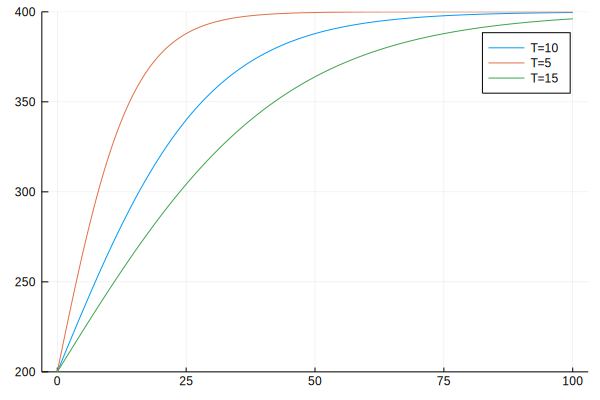

In [5]:
N₀=200
t=collect(0:0.1:100)
T=10
μ=log(2)/T
K=400
plot(t,t->N₀*K/(N₀ +(K-N₀)*exp(-μ*t)),label="T=10",seriestype=:line,ylims = (200,400))
T=5
μ=log(2)/T
plot!(t,t->N₀*K/(N₀ +(K-N₀)*exp(-μ*t)),label="T=5",seriestype=:line,ylims = (200,400))
T=15
μ=log(2)/T
plot!(t,t->N₀*K/(N₀ +(K-N₀)*exp(-μ*t)),label="T=15",seriestype=:line,ylims = (200,400))

# Differentiation dynamics

what happens when we analyze the dynamcis of a population of cells that not only proliferates, but also differentiates into another type of cell? For instance, a population of stem cells, in a developing organ. We assume a developing organ as a population of cycling progenitors 'P' that cycle with an average cell cycle $T$. Some of these cells terminally differentiate, exit the cell cycle and acquire a given specialized phenotype 'D'. We start from a initial population of progenitors $P_0$ and differentiated $D_0$ cells. A common approac is top characterize the dynamics of the population focusing on the outcome of the cell division of the progenitors. In principle, each division of a 'P' cell can give two progenitors ('pp' division), two differentiated cells ('dd' division) and also an assymetric mode of divisin where a progenitor and a differentiated cell is generated ('pd' division). If we calculate the average amount of 'P' and 'D' generated after a single cell cycle (n=1) we can write the number of progenitor and differentiated cells as:

$$
\begin{eqnarray}
P_1&=&P_{0}(2pp+pd) \tag{35}\\
D_1&=&D_{0}+P_{0}(2dd+pd)\tag{36}
\end{eqnarray}
$$

where using the condition $pp+pd+dd=1$, 

$$
\begin{eqnarray}
P_1&=&P_{0} (1+pp-dd)\tag{37}\\
D_1&=&D_{0}+P_{0}(1+dd-pp)\tag{38}
\end{eqnarray}
$$

Therfore, for n=2,

$$
\begin{eqnarray}
P_2&=&P_{1} (1+pp-dd)\tag{39}\\
D_2&=&D_{1}+P_{1}(1+dd-pp)\tag{40}
\end{eqnarray}
$$

applying eqs. 37 and 38, we obtain

$$
\begin{eqnarray}
P_2&=&P_{0}(1+pp-dd)(1+pp-dd)=P_{0} (1+pp-dd)^2\tag{41}\\
D_2&=&D_{0}+P_{0}(1+dd-pp)+P_{0}(1+pp-dd)(1+dd-pp)\tag{42}
\end{eqnarray}
$$

and rearranging terms in eq. 42:
$$
\begin{eqnarray}
D_2&=&D_{0}+P_{0}(1+dd-pp)(1+(1+pp-dd))\tag{43}\\
\end{eqnarray}
$$

Subsequently, for n=3
$$
\begin{eqnarray}
P_3&=&P_{2} (1+pp-dd)\tag{44}\\
D_3&=&D_{2}+P_{2}(1+dd-pp) \tag{45}
\end{eqnarray}
$$


applying eqs. 41 and 42, we obtain
$$
\begin{eqnarray}
P_3&=&P_{0} (1+pp-dd)^2 (1+pp-dd)= P_{0} (1+pp-dd)^3 \tag{46}\\
D_3&=&D_{0}+P_{0}(1+dd-pp)(1+(1+pp-dd) + (1+pp-dd)^2) \tag{47}
\end{eqnarray}
$$

therefore, for $n$ steps, we obtain, 

$$
\begin{eqnarray}
P_n&=&P_{0} (1+pp-dd)^n \tag{48}\\
D_n&=&D_{0}+P_{0}(1+dd-pp)(1+(1+pp-dd)+(1+pp-dd)^2+...+(1+pp-dd)^{n-1})\tag{49}
\end{eqnarray}
$$

where the second term in eq. 49 can be written as
$$
\begin{eqnarray}
1+(1+pp-dd)+(1+pp-dd)^2+...+(pp-dd)^{n-1}=\displaystyle\sum_{i=0}^{n-1} (1+pp-dd)^i\tag{50}
\end{eqnarray}
$$

which renaming $r=1+pp-dd$ is equivalent to 
$$
\begin{eqnarray}
\displaystyle\sum_{i=0}^{n-1} r^i=\frac{1-r^n}{1-r}\tag{51}
\end{eqnarray}
$$

therefore, eq. 50 can be written as
$$
\begin{eqnarray}
D_n&=&D_{0}+P_{0}(1+dd-pp)\frac{1-(1+pp-dd))^n}{1-(1+pp-dd)} \tag{51}
\end{eqnarray}
$$

which, after simplifying terms, can be rewritten as
$$
\begin{eqnarray}
D_n&=&D_{0}+P_{0}(1-(1+pp-dd)^n)\frac{1+dd-pp}{dd-pp}\tag{52}
\end{eqnarray}
$$

and taking into account eq. 48, we obtain the final equation for the number of progenitors 'P' and differentiated 'D' cells in a stem cell population that is growing and differentiating:
$$
\begin{eqnarray}
D_n&=&D_{0}+(P_{0}-P_{n})\frac{1+dd-pp}{dd-pp}=D_{0}+(P_{n}-P_{0})\frac{1+dd-pp}{pp-dd} \tag{53}
\end{eqnarray}
$$

Interestingly, both equations depend on the iteration step $n$ only via the number of progenitors at a given time in the system $P_n$. 

For simplicity, the system of equations has been derived for a situation of discrete $n=\Delta t/T$, (n=1,2,3...), i.e., with the time step equal to the average cell cycle $\Delta t=T$. If we instead consider the time step as half of the cell cycle ($\Delta t=T/2$), then $n=2 \Delta t/T$, (n=1,2,3...), and eq. 37 is now:
$$
\begin{eqnarray}
P_1&=&P_{0} (1+pp-dd)^{\frac{1}{2}}\tag{54}
\end{eqnarray}
$$

and following identical iteration steps we arrive at
$$
\begin{eqnarray}
P_n&=&P_{0} (1+pp-dd)^{\frac{n}{2}}\tag{55}
\end{eqnarray}
$$

while eqs. for 'D' cells remain the same, since it does not depend explicitly on the iteration step. This way, for $\delta t=1$, and following the same process we obtain
$$

\begin{eqnarray}
P_n&=&P_{0} (1+pp-dd)^{\frac{n}{T}}\tag{56}
\end{eqnarray}
$$

which can be generalize for the continuum limit $n=t$,

$$
\begin{eqnarray}
P_{t}&=&P_0 (1+pp-dd)^{\frac{t}{T}}\tag{57}\\
D_{t}&=&D_{0}+(P_{t}-P_{0})\frac{1+dd-pp}{pp-dd}\tag{58}
\end{eqnarray}
$$

Finally, f we rewrite  $\Delta$$P=P_{t}-P_{0}$, we obtain the expression. 
$$
\begin{eqnarray}
P_{t}&=&P_0 (1+pp-dd)^{\frac{t}{T}}\tag{59}\\
D_{t}&=&D_{0}+\Delta P\frac{1+dd-pp}{pp-dd}\tag{60}
\end{eqnarray}
$$

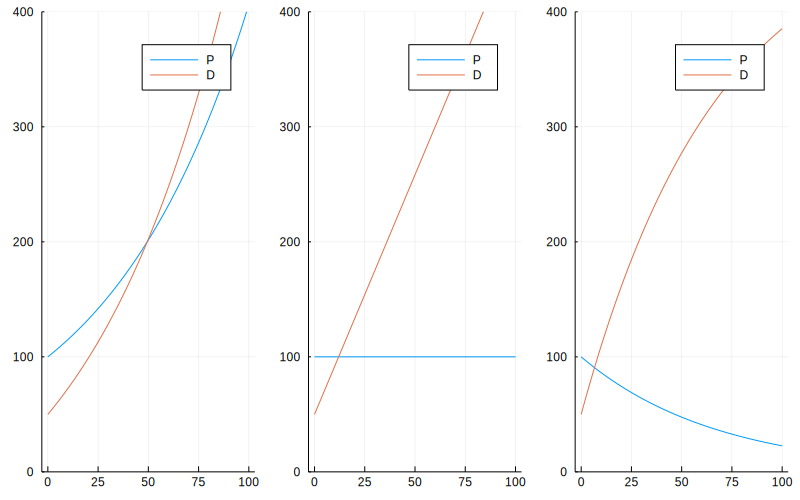

In [6]:
pp=0.6
dd=0.2
P₀=100
D₀=50
T=24
t=collect(0:0.1:100)
P1=plot(t,t->P₀*(1+pp-dd)^(t/T),label="P",seriestype=:line,ylims = (0,4300))
plot!(t,t->D₀+P₀*(((1+pp-dd)^(t/T))-1)*((1-pp+dd)/(pp-dd)),label="D",seriestype=:line,ylims = (0,400))

pp=0.0001
dd=0.00001
P2=plot(t,t->P₀*(1+pp-dd)^(t/T),label="P",seriestype=:line,ylims = (0,4300))
plot!(t,t->D₀+P₀*(((1+pp-dd)^(t/T))-1)*((1-pp+dd)/(pp-dd)),label="D",seriestype=:line,ylims = (0,400))

pp=0.0001
dd=0.3
P3=plot(t,t->P₀*(1+pp-dd)^(t/T),label="P",seriestype=:line,ylims = (0,4300))
plot!(t,t->D₀+P₀*(((1+pp-dd)^(t/T))-1)*((1-pp+dd)/(pp-dd)),label="D",seriestype=:line,ylims = (0,400))

plot(P1,P2,P3,layout=(1,3),legend=true,size = (800, 500))

to do:
    
    it will be cool to include a term of saturations as the logistic equation does. 
    

The true power of these equatiosn is that they are analytical, in the sense that now we turn the equations down to see if we can predict the correct value of pp-dd and T

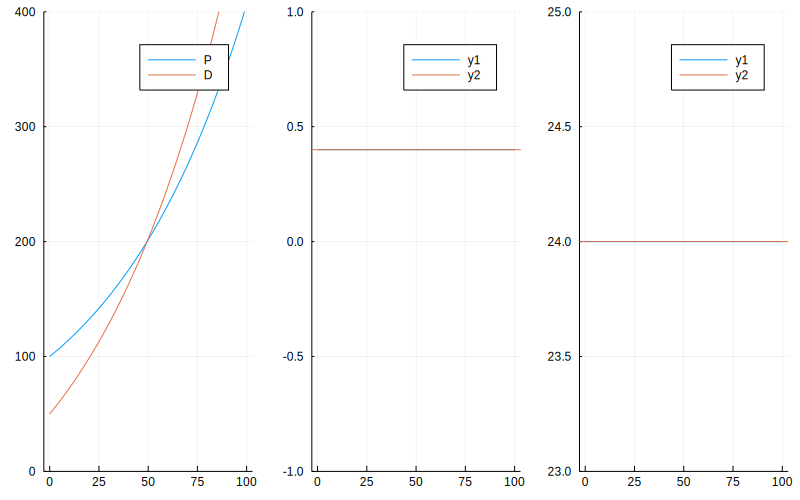

In [7]:
pp=0.6
dd=0.2
P₀=100
D₀=50
T_true=24
t=collect(0:0.1:100)

P=P₀.*(1+pp-dd).^(t./T_true)
D=D₀.+P₀.*(((1 .+pp-dd).^(t./T_true)).-1).*((1-pp+dd)/(pp-dd))

P1=plot(t,P,label="P",seriestype=:line,ylims = (0,4300))
plot!(t,D,label="D",seriestype=:line,ylims = (0,400))

P_=P[2:end]
D_=D[2:end]
t_=t[2:end]
P__=P[1:end-1]
D__=D[1:end-1];
t__=t[1:end-1];
gamma=1
pp_dd=(P_ .-P__) ./(P_ .-P__ .+D_ .-D__);
T=(t_ .-t__) .* log.(1 .+(gamma.*(abs.(pp_dd)))) ./ abs.(log.(P_ ./P__));
P2=plot(t_,pp_dd, ylims = (-1,1))
hline!([pp-dd])
P3=plot(t_,T,ylims = (23,25))
hline!([T_true])

plot(P1,P2,P3,layout=(1,3),legend=true,size = (800, 500))

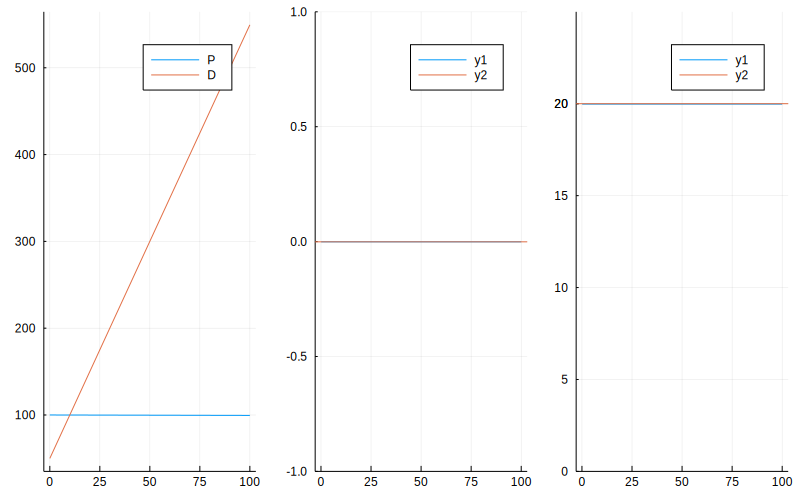

In [8]:
pp=0.1
dd=0.101
P₀=100
D₀=50
T_true=20
t=collect(0:0.1:100)

P=P₀.*(1+pp-dd).^(t./T_true)
D=D₀.+P₀.*(((1 .+pp-dd).^(t./T_true)).-1).*((1-pp+dd)/(pp-dd))

P1=plot(t,P,label="P",seriestype=:line)
plot!(t,D,label="D",seriestype=:line)

P_=P[2:end]
D_=D[2:end]
t_=t[2:end]
P__=P[1:end-1]
D__=D[1:end-1];
t__=t[1:end-1];
gamma=1
pp_dd=(P_ .-P__) ./(P_ .-P__ .+D_ .-D__);
T=(t_ .-t__) .* log.(1 .+(gamma.*(abs.(pp_dd)))) ./ abs.(log.(P_ ./P__));
P2=plot(t_,pp_dd, ylims = (-1,1))
hline!([pp-dd])
P3=plot(t_,T,ylims = (0,25))
hline!([T_true])

plot(P1,P2,P3,layout=(1,3),legend=true,size = (800, 500))

The equations for the cell cycle start to fail whene we go to values lower than pp-dd=0

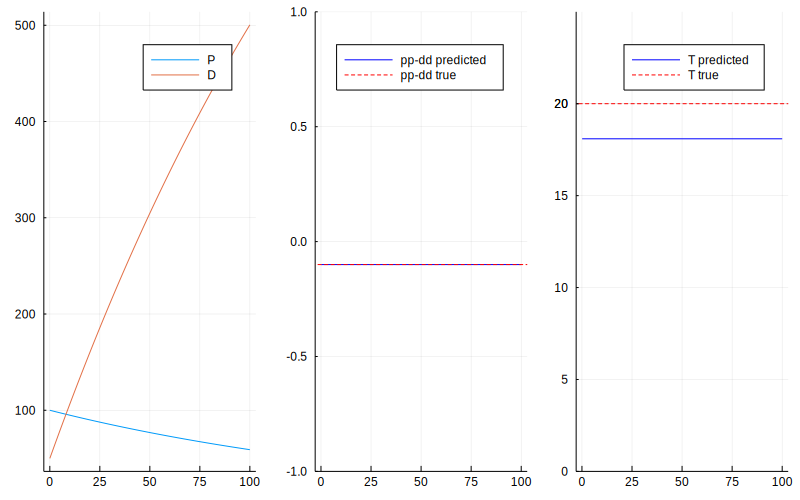

In [18]:
pp=-0.1
dd=0.0
P₀=100
D₀=50
T_true=20
t=collect(0:0.1:100)

P=P₀.*(1+pp-dd).^(t./T_true)
D=D₀.+P₀.*(((1 .+pp-dd).^(t./T_true)).-1).*((1-pp+dd)/(pp-dd))

P1=plot(t,P,label="P",seriestype=:line)
plot!(t,D,label="D",seriestype=:line)

P_=P[2:end]
D_=D[2:end]
t_=t[2:end]
P__=P[1:end-1]
D__=D[1:end-1];
t__=t[1:end-1];
gamma=1
pp_dd=(P_ .-P__) ./(P_ .-P__ .+D_ .-D__);
T=(t_ .-t__) .* log.(1 .+(gamma.*(abs.(pp_dd)))) ./ abs.(log.(P_ ./P__));
P2=plot(t_,pp_dd, ylims = (-1,1),label="pp-dd predicted",line = (:blue, 1))
hline!([pp-dd],label="pp-dd true",line = (:red,:dash, 1))
P3=plot(t_,T,ylims = (0,25),label="T predicted",line = (:blue, 1))
hline!([T_true],label="T true",line = (:red,:dash, 1))

plot(P1,P2,P3,layout=(1,3),legend=true,size = (800, 500))

## Including Apoptosis

what if we include apoptosis

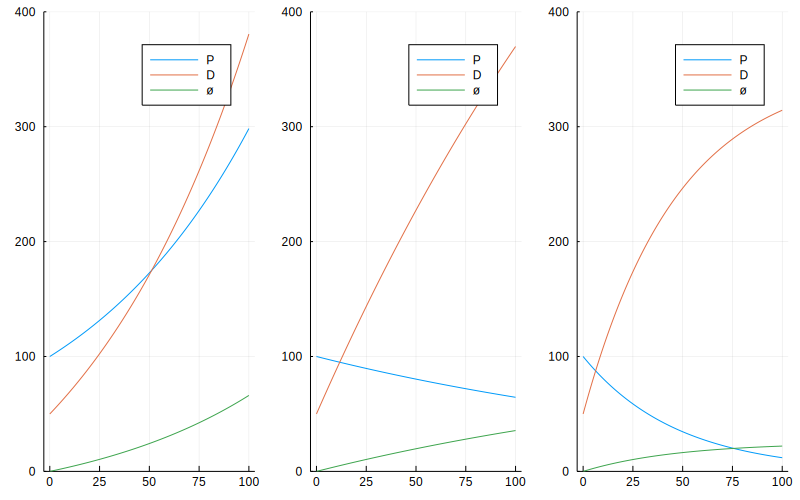

In [10]:
pp=0.6
dd=0.2
ø=0.1
P₀=100
D₀=50
T=24
t=collect(0:0.1:100)
P1=plot(t,t->P₀*(1+pp-dd-ø)^(t/T),label="P",seriestype=:line,ylims = (0,4300))
plot!(t,t->D₀+P₀*(((1+pp-dd-ø)^(t/T))-1)*((1-pp+dd-ø)/(pp-dd-ø)),label="D",seriestype=:line,ylims = (0,400))
plot!(t,t->P₀*(((1+pp-dd-ø)^(t/T))-1)*(ø/(pp-dd-ø)),label="ø",seriestype=:line,ylims = (0,400))



pp=0.0001
dd=0.00001
ø=0.1
P2=plot(t,t->P₀*(1+pp-dd-ø)^(t/T),label="P",seriestype=:line,ylims = (0,4300))
plot!(t,t->D₀+P₀*(((1+pp-dd-ø)^(t/T))-1)*((1-pp+dd-ø)/(pp-dd-ø)),label="D",seriestype=:line,ylims = (0,400))
plot!(t,t->P₀*(((1+pp-dd-ø)^(t/T))-1)*(ø/(pp-dd-ø)),label="ø",seriestype=:line,ylims = (0,400))


pp=0.0001
dd=0.3
ø=0.1
P3=plot(t,t->P₀*(1+pp-dd-ø)^(t/T),label="P",seriestype=:line,ylims = (0,4300))
plot!(t,t->D₀+P₀*(((1+pp-dd-ø)^(t/T))-1)*((1-pp+dd-ø)/(pp-dd-ø)),label="D",seriestype=:line,ylims = (0,400))
plot!(t,t->P₀*(((1+pp-dd-ø)^(t/T))-1)*(ø/(pp-dd-ø)),label="ø",seriestype=:line,ylims = (0,400))

plot(P1,P2,P3,layout=(1,3),legend=true,size = (800, 500))